$\newcommand{\bra}[1]{\left<#1\right|}$
$\newcommand{\ket}[1]{\left|#1\right>}$

# Cloning a quantum sheep?

## Learning goals
The completion of this assignment will allow the student to
* enunciate and demonstrate the no-cloning theorem
* list three consequences of the theorem
* explain that while some states can be cloned by some unitaries, general
states cannot be cloned by a single unitary
* describe a simple method of classical error correction that cannot
be implemented in quantum computers
* overcome the impossibility of classical error correction by developing the simplest
quantum error correction schemes

## Introduction

Geneticists clone sheeps,
you clone files and folders in your computer -- as evinced by
your certainly trustworthy copy-and-paste skills. In the quantum world, however, 
this is not possible.
A no-cloning theorem precludes the reproduction of a general quantum state, a phenomenon of crucial importance. Its consequences range from the preservation of causality to constraining schemes for correction of errors in quantum computers. In what follows, we explore these phenomena with some activities. We start by a short
reminding of the theorem and its demonstrations, enumerate the consequences
and explore the learned concepts in some exercises.

## The no-cloning theorem

Suppose we have two quantum systems A and B of identical Hilbert spaces
$H_{A}=H_{B}=H$. Given an arbitrary product statestate $\left|\phi;e\right\rangle \in H_{A}\otimes H_{B}$,
it is impossible to copy $\left|\phi\right\rangle$ into $H_{B}$ by a unitary transformation
(the generality of the state implies this transformation must be independent
of the state). In other words, $\nexists$ a general $U$ such that
\begin{equation}
U\ket{\phi;e} =e^{i\alpha\left(\phi;e\right)}\ket{\phi;\phi} .
\end{equation}

for arbitrary $\left|\phi\right\rangle $ and a reference state $\left|e\right\rangle $.

## Proof

Suppose such transformation $U$ exists.
Then, we can pick another state $\left|\psi;e\right\rangle $ in $H_{A}\otimes H_{B}$
and compute

\begin{align}
 \left( \bra{\psi;e}\right) \left( \ket{\phi;e}  \right) 
 & =\bra{\psi;e} U^{\dagger} U \ket{\phi;e} \nonumber \\
 &=e^{i\left[\alpha\left(\phi,e\right)-\alpha\left(\beta,e\right)\right]}
\left( \bra{\psi;\psi}\right) \left( \ket{\phi;\phi}  \right) \nonumber
\\
\Rightarrow\left|\left\langle \psi|\phi\right\rangle \right|^{2} 
& =\left|\left\langle \psi|\phi\right\rangle \right|^{4}.
\end{align}

Now this is true $\iff\left|\left\langle \psi|\phi\right\rangle \right|=1$
or $\left|\left\langle \psi|\phi\right\rangle \right|=0$. Since $\left|\psi\right\rangle $
and $\left|\phi\right\rangle $ are both arbitrary, this is an absurd,
proving that no such unitary $U$ exists.

> ***Exercise 1.*** Argue that, fundamentally, cloning is prohibited because of the *linearity of quantum mechanics*. It might be helpful to come up with a different way of proving the no-cloning theorem where this fact is more apparent.
> 
> *Solution (for single-qubit case): Given $\psi = \alpha \ket{0} + \beta \ket{1}$ 
> we have*
>
>$$
U \left( \alpha \ket{0} + \beta \ket{1} \right) \otimes \ket{e}  = 
\left(\alpha \ket{0} + \beta \ket{1}\right) \otimes \left(\alpha \ket{0} + \beta \ket{1}\right)
$$
>
>*But now the right-hand side of the equation is non-linear in the coefficents $\alpha, \beta$. If you perform two derivatives by either $\alpha$ or $\beta$, you get a contradiction. Thus, our assumption that  a general $U$, i.e. independent of $\alpha$ and $\beta$,  can clone states is wrong.*

Finally, we give a very intuitive proof of the no-cloning theorem for a single-qubit state. The equation

$$
U  \ket{\psi;0}  = \ket{\psi;\psi} 
$$

can be graphically represented using the tensor product of two Bloch vectors.

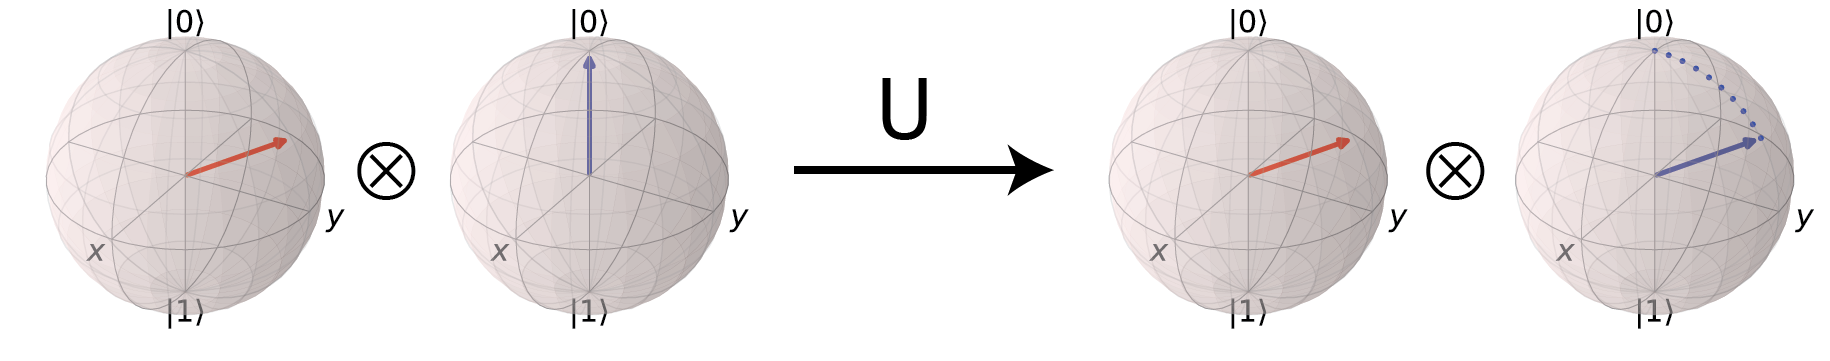

It is then clear that the cloning operator $U$ is simply the unitary that rotates the second qubit from $\ket{0}$ into $\ket{\psi}$. However, remember that we want $U$ to be universal, i.e. it cannot depend on any parameters, and $\ket{\psi}$ is arbitrary. The same fixed rotation could never turn a reference state $\ket{0}$ into any *arbitrary* $\ket{\psi}$! The validity of the theorem becomes fairly obvious under this picture.

###  consequences

Some  noteworthy consequences of the no-cloning theorem are:

* Classical error correction cannot be applied in quantum computers.
Backup copies of a state in the middle of a quantum computation cannot be created and used for correcting subsequent errors;
* One cannot teleport a quantum state without destroying it;
* One cannot use quantum entanglement to transmit classical information 
* No-teleportation theorem
* No-communication theorem
* No broadcasting theorem

<!--(distribute the components of a maximally entangled Bell state between A and B. A could send bits to B as: if wants to transmit a "0", measure spin in z-direction, collapsing B state to $+$ or $-$. To transmit "1", A does nothing to qubit. B creates many copies of its state and measure spin z. Will know that a "0" was transmitted if all copies produce the same result, otherwise measurement outcomes will be $+$ and $-$ with equal probabilities. A could communicate classical bits to B then, possibly violating causality);-->

Let us explore some of these in the following exercises

### CNOT vs cloning

$\newcommand{\ket}[1]{|#1\rangle}$

Cloning of general quantum states is impossible, but knowing exactly what is a given state we want to clone, cloning is possible.
To get a feeling on this, create a 2-qubit circuit initialized
at $\ket{0,0} $. The first qubit will be our input state that we want to clone. Let us study the cloning capacity of a given unitary: the CNOT gate.

> **Exercise 2a.** Apply `CNOT` with `qubit_1` as control. Perform a measurement in the computational basis. Are both qubits the same? Is the resulting state entangled?

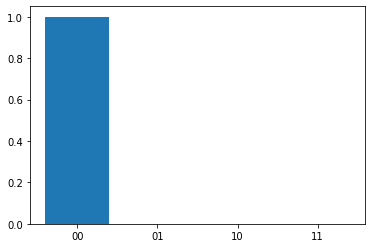

In [1]:
import pennylane as qml
import matplotlib.pyplot as plt
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit():
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0,1])

# run the circuit and plot measurement result
probs = circuit()

plt.bar(['00', '01', '10', '11'], probs);

> **Exercise 2b.** Repeat above circuit, but now choose $\ket{1;0}$ as the input state. Does the cloning succeed? Is the resulting state entangled? 

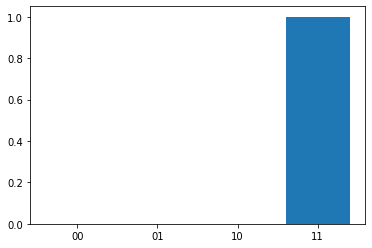

In [2]:
@qml.qnode(dev)
def circuit():
    qml.PauliX(0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0,1])

plt.bar(['00', '01', '10', '11'], circuit());

$\newcommand{\ket}[1]{|#1\rangle}$

>**Exercise 2c.** Now initialize the input qubit in state $\ket{+;0}= \frac{1}{\sqrt{2}}\left(\ket{0} + \ket{1}\right) \otimes \ket{0}$ and run the CNOT-circuit. By comparing the measurement outcomes with the expected outcomes for the successful cloning result $\ket{+;+} $, show that our cloning attempt has failed. Is the resulting state entangled? (what about $\ket{+;+}$? Is it entangled?)

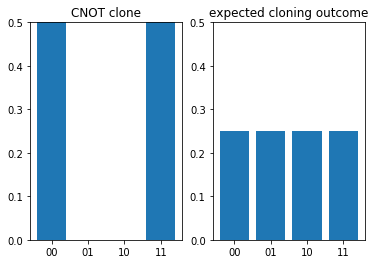

In [3]:
@qml.qnode(dev)
def cnot_clone():
    qml.Hadamard(0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0,1])

@qml.qnode(dev)
def expected_clone():
    qml.Hadamard(0)
    qml.Hadamard(1)
    return qml.probs(wires=[0,1])

plt.subplot(121)
plt.bar(['00', '01', '10', '11'], cnot_clone());
plt.ylim(0,0.5);
plt.title("CNOT clone");

plt.subplot(122)
plt.bar(['00', '01', '10', '11'], expected_clone());
plt.ylim(0,0.5);
plt.title('expected cloning outcome');

$\newcommand{\ket}[1]{|#1\rangle}$

If we restrict ourselves to the input states $\ket{0}$ and $\ket{1}$ and do not allow any superposition (i.e. we require *classical* input states), we see that a single unitary, the `CNOT` gate, does in fact act as a cloning gate. This should not be a surprise since cloning of classical information is perfectly allowed.

> **Exercise 2d.** Generalize the `CNOT` gate into a gate that allows cloning two arbitrary orthogonal states $\ket{\phi_0}, \ket{\phi_1}$ where $\langle \phi_1 | \phi_2 \rangle = 0$ and superpositions are not allowed.

### Cloning and causality

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
Let us define the operator

\begin{eqnarray*}
	S_{\mathbf{n}} = n_x X + n_y Y + n_z Z
\end{eqnarray*}

where $\mathbf{n}$ is unit vector and $X,\,Y,\,Z$ are Pauli matrices. It is useful to represent this vector in spherical coordinates.
> **Exercise 3a.** Show that $S_{\mathbf{n}}$ can only have eigenvalues $\pm1$. 


> **Exercise 3b.** Show that 
$		\ket{0,\mathbf{n}}= \cos\left(\frac{\theta}{2}\right)  e^{-i\phi/2}
	\ket{0} 
	+\sin\left(\frac{\theta}{2}\right)  e^{i\phi/2}
	\ket{1} 
$
> is an eigenvector of $S_{\mathbf{n}}$. What is the corresponding eigenvalue?

> **Exercise 3c.** What is the second eigenvector $\ket{1,\mathbf{n}}$ in terms of $\ket{0}$ and $\ket{1}$?

We now consider the singlet state

$$
	\frac{1}{\sqrt{2}}\left(\ket{0;1} - \ket{1;0}\right)
$$

This is an entangled state of a two-qubit system.

> **Exercise 3d.** Show that above state is a singlet state for any basis-rotation, i.e. show that
$ 	\ket{0;1}  - \ket{1;1}
	=
	\ket{0,\mathbf{n};1,\mathbf{n}} - \ket{1,\mathbf{n};0,\mathbf{n}}
$
for arbitrary $\mathbf{n}$.

Above result tells us that no matter what choise of axis $\mathbf{n}$, the two qubits always measure to opposite values. This is a *quantum correlation*, entanglement. Let us pretend that cloning of an arbitrary and unknown state is possible for a second. Under that assumption, consider then the following protocol:

1. Alice and Bob each share one qubit of the two-qubit singlet state. Alice is on earth, Bob is located somewhere in Alpha Centauri

2. Alice measures her qubit in the basis of $S_{\mathbf{n}}$. This collapses the state to either $\ket{0,\mathbf{n};1,\mathbf{n}}$ or $\ket{1,\mathbf{n};0,\mathbf{n}}$. Note that the qubits are now unentangled and the Bloch vectors point	along direction $\mathbf{n}$ that Alice has chosen.

3. Bob now makes a bunch of copies using the $U$ cloning device.
> **Exercise 3e.** Explain how Bob can now find out the direction $\mathbf{n}$. 

The implication is that the information of the direction $\mathbf{n}$ has been transmitted through the galaxy, possibly at a greater speed than light. This violates causality! Fortunately, we have shown that cloning is impossible.


### Bonus(?): error correction vs no-cloning

The matter of error correction is tied to a question of utmost importance. Despite the great engineering challenges, that may take decades to overcome, what makes us think that scalable quantum computing is possible even *in principle*?!

Here are the main reasons why people have doubted so:
* Large entangled states are inherently fragile
    + *the decoherence of a single qubit will make a whole system decohere*
* Errors in unitary gates snow ball
    + *if an $X$ gate flips a qubit bu 179 degrees, instead of 180, effects build up after many operations*
    + *this is the reason why digital computers completely took over analog computers*
* The no-cloning theorem precludes error correction schemes
    + *usually errors are detected and corrected by repetition and redundancy, which we cannot do in the quantum world for arbitrary states, as we have learned*
    
The piece of good news is that all of these have been addressed in crucial results from the 90s. The first of these results was the development of *quantum error correction* theory, which remains a very active field of research to date. To discuss its basics, let us start by introducing the basics of *classical* error correction.

 **The 3-bit repetition code: the power of the masses**
 
Here we use redundancy as a venue to protect information. Sets of "physical bits" are joined into "logical bits"; operations are made on the latter.
Consider $\bar{0}$ a logical $0$ encoded as a 3-bit string $000$. Similarly, the logical $1$ is written $\bar{1}$ and encoded as $111$.

> **Exercise 4a.** Assume we stop to take a look at our bits in a timescale so that a maximum of a single error may or may not have ocurred. Explain how one would be sure to detect and correct such error. 

> **Exercise 4b.** Write a classical code that allows for a random mistake to happen in an set of bits initialized randomly as $\bar{0}$ or $\bar{1}$, finds it, and correct it.

In [4]:
# solution 4b
import random 
from collections import Counter


# randomly encode logical bit
bitchoice=random.getrandbits(1) 
print(bitchoice)
if bitchoice:
    lbit= [1,1,1]
else: 
    lbit=[0,0,0]

# generate a random error
flippick=random.choice(range(4))
if flippick < 3:
    lbit[flippick]= int(not lbit[flippick])   
print(lbit)

# find and correct error
if Counter(lbit).most_common(1)[0][0]:
    lbit= [1,1,1]
else: 
    lbit=[0,0,0]
    
print(lbit)


1
[1, 1, 1]
[1, 1, 1]


Note using redundancy for error correction has a cost; scaling of a computer becomes much less obvious if you have to encode bits inside bits in order to have a trustworthy calculation.  In the times of "bad bits" -- such as vacuum tubes -- skeptics claimed that technology would never scale. In addressing such claims, John von Neumann proved the **Classical Fault Tolerance** theorem.

> *in few words, von Neumann proved that it is possible to build a reliable computer out of unreliable parts. As long as errors are small, recursive uses of majorities for error correction lead to a "net win".*

The advent of "proper bit technology", in the form of transistors made this result mostly useless for classical computers, as errors became absolutely negligible. For quantum computers, we are yet to find the "ideal bit", so we are stuck with having to correct for errors.

How does is this even possible? quantum errors form a continuum in the Bloch sphere. A possible infinitely small error could be

$$
	\ket{0} \to \sqrt{1-\epsilon^2}\ket{0}+\epsilon \ket{1}.
$$

This error - called a continuous drift - can be safely accounted for: simply keep measuring the qubit in the $\ket{0},\,\ket{1}$ basis. If you find a $\ket{0}$, no error happened at the moment, if you find $\ket{1}$ correct to $\ket{0}$. This is fine as long as the qubit is purely in one of the basis vectors (so the measurement basis has to be adapted accordingly). But what if the error are discrete bit flips?

Discrete single-qubit errors can be described by Pauli matrices. For example, a qubit flip is a Pauli $X$ acting on a qubit; a phase flip is a Pauli $Z$ acting on a qubit. In what follows, we explore the effects of these in the repetition code.

> **Exercise 4c.** Repeat exercise 4b, now using qubits. The quantum repetition code encodes qubits as: $\ket{\bar{0}}\to\ket{0;0;0}$ and $\ket{\bar{1}}\to\ket{1;1;1}$. Detect the error by measuring the outcome probabilities of the encoded logical qubit after introducing 1 random Pauli $X$ error. Decide for correction with the usual Majority rule.

In [10]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import random 
from collections import Counter

dev = qml.device('default.qubit', wires=3)

# randomly chose bit to encode
bitchoice=random.getrandbits(1) 
print(bitchoice)

# randomly pick error
flippick=random.choice(range(4))


# encoding logical bit, applying random flip, and correcting
@qml.qnode(dev)
def circuit():
    if bitchoice:
        qml.PauliX(0)
        qml.PauliX(1)
        qml.PauliX(2)    
    if flippick < 3:
        qml.PauliX(flippick)
        
    return qml.probs(wires=[0,1,2])

# run the circuit and find state after error; count majority to find original state
probs = circuit()
stateerr=np.binary_repr(np.argmax(probs),3)
int(Counter(stateerr).most_common(1)[0][0])


0


0

You may be wondering about the issue of measuring my circuit in order to make corrections. Particularly for a random state $\ket{\psi}=a\ket{0}+b\ket{1}$, collapsing will make you lose your information, not to say it will stop your whole calculation. 

That is a reasonable concern, but our story of error correction is not done. Correcting circuits actually implement protocols that are capable of accounting for errors in random states and fixing them on the go without measuring the circuit. For bit flip errors, the 'correct' error-correcting circuit reads in the figure below.

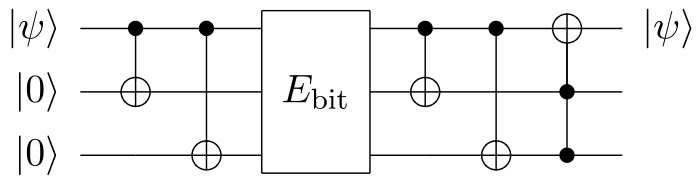

where $E_{bit}$ stands for a randomly placed Pauli $X$ bit flip error, the "dot $\oplus$" vertical bars are CNOT gates and the last 3-qubit "double-dot $\oplus$" gate is a doubly controlled NOT gate known as a Toffoli gate.

> **Exercise 4d.** Convince yourself that wherever $E_{bit}$ introduces a bit flip, the general state $\ket{\psi}$ is always preserved. Code this circuit in a quantum simulator and verify the circuit's functionality.

In [27]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import random 
from collections import Counter

dev = qml.device('default.qubit', wires=3)

# randomly chose bit to encode
bitchoice=random.getrandbits(1) 
print(bitchoice)

# randomly pick error
flippick=random.choice(range(4))


@qml.qnode(dev)
def circuit():
    if bitchoice == 1:
        qml.PauliX(0)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[0,2])
    if flippick < 3:
        qml.PauliX(flippick)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[0,2])
    qml.Toffoli(wires=[2,1,0])
    return qml.probs(wires=[0,1,2])

# run the circuit and find state after error; count majority to find original state
probs = circuit()
stateerr=np.binary_repr(np.argmax(probs),3)
print(stateerr)

0
001


As discussed, bit flips are, unfortunately, not the only types of discrete errors a quantum computer can have. What happens if we bring Pauli $Z$, phase flip errors into the discussion?

> **Exercise 4e.** Now consider a change of basis, with the repeated encoding of the Hadamard states $\ket{\bar{+}}\to\frac{\ket{0;0;0}+\ket{1;1;1}}{\sqrt{2}}$ and $\ket{\bar{-}}\to\frac{\ket{0;0;0}-\ket{1;1;1}}{\sqrt{2}}$. A single Pauli quantum gate can be applied to randomly  any qubit in $\ket{\bar{+}}$ turning it into $\ket{\bar{-}}$; what is that quantum gate? 

> **Exercise 4f.** Rewrite the 3-bit repetition code but now in the Hadamard basis $\ket{\bar{+}}\to \ket{+;+;+}$ and $\ket{\bar{-}}\to \ket{-;-;-}$ (note the difference in the encoding when changing the basis of choice from the computational to Hadamard). Show with your code that a a phase-flip can now be detected and corrected for. Show also that a single bit-flip now can destroy our encoding fliping $\ket{\bar{+}}$ to $\ket{\bar{-}}$. The diagram for the phase-flip correcting code follows below.

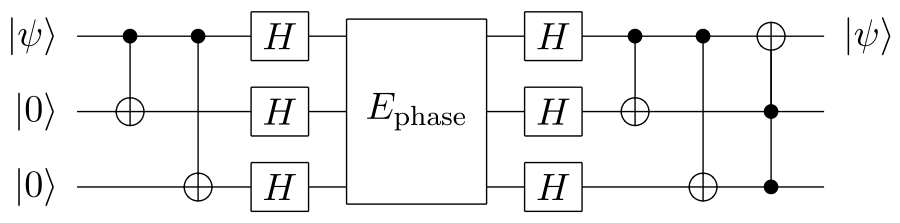

In [ ]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
import random 
from collections import Counter

dev = qml.device('default.qubit', wires=3)

# randomly chose bit to encode
bitchoice=random.getrandbits(1) 
print(bitchoice)

# randomly pick error
flippick=random.choice(range(4))


@qml.qnode(dev)
def circuit():
    if bitchoice == 1:
        qml.PauliX(0)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[0,2])
    qmp.Hadamard(0)
    qmp.Hadamard(0)
    qmp.Hadamard(0)
    if flippick < 3:
        qml.PauliZ(flippick)
    qmp.Hadamard(0)
    qmp.Hadamard(0)
    qmp.Hadamard(0)    
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[0,2])
    qml.Toffoli(wires=[2,1,0])
    return qml.probs(wires=[0,1,2])

# run the circuit and find state after error; count majority to find original state
probs = circuit()
stateerr=np.binary_repr(np.argmax(probs),3)
print(stateerr)

If you succeded in the exercises above, you will have learned that one does not need to worry only with bit-flip errors (Pauli $X$'s), but also with phase-flip errors (Pauli $Z$'s). But aren't there an infinite amount of other ways for a qubit to err?

Well, since many specialists are confident that quantum computing *can* happen, you may guess tht this is not the end of the story. Amusingly, the linearity of quantum mechanics Hilbert spaces and entanglement saves us here! Writing a code that accounts just for bit- and phase-flips is enough to correct *any* 1-qubit error! How so? Consider an entangled state

$$
	\ket{\Psi_0} \to \alpha \ket{0;\nu} + \beta \ket{1;w}
$$

and the states you would arrive by a bit flip, phase flip, and joint bit-phase flip, all applied to the first qubit; respectively, 

\begin{align}
	\ket{\Psi_1} \to \alpha \ket{1;\nu} + \beta \ket{0;w}\\
	\ket{\Psi_2} \to \alpha \ket{0;\nu} - \beta \ket{1;w}\\
	\ket{\Psi_3} \to \alpha \ket{1;\nu} - \beta \ket{0;w}\\    
\end{align}

Inspect these closely, though. They form an *orthogonal basis* for the 4-dimensional space that you can arrive by transformations on the first qubit! So if errors act on single qubits (no entanglement in random errors), particularly on the first one up here, we may reshape our question: "how do we return to $\ket{\Psi_0}$ from wherever we are in the 4 dimensional space"?

Let us answer the question above. First lesson: don't try measuring all qubits or the quantum state will be destroyed! Second lesson: use your basis! Measure by projecting onto the four basis vectors and perform the following protocol:
> * If the outcome is $\ket{\Psi_0}$, do nothing
> * If the outcome is $\ket{\Psi_1}$, apply a bit flip to qubit 1
> * If the outcome is $\ket{\Psi_2}$, apply a phase flip to qubit 1
> * If the outcome is $\ket{\Psi_3}$, apply a bit flip and a phase flip to qubit 1
Notice that this measurement protocol is in a entangled basis! 

As we saw, we need to be able to detect *and* correct for *both* bit- and phase-flip errors in a qubit and, if so, we would have been able to correct for any discrete qubit error. Above we saw two different codes: in exercise 4c, we could detect and correct for bit flips only; in 4f, we could detect and correct phase flips only. 

Shor proposed the 9-bit code: combine the two ideas and encode each logical qubit in a $9 \times 9$ lattice as

\begin{align}
\ket{\bar{0}}=\left(\frac{\ket{0;0;0}+\ket{1;1;1}}{\sqrt{2}} \right)^{\otimes 3}
\end{align}

This code *can* correct for both bit- and phase-flip errors! If you still have energy, try visualizing that majority rules can be applied both on qubit values and in the relative phase between "000" and "111" within each row of the lattice so as to correct either error. The circuit for the code follows below, if you want to implement it yourself.

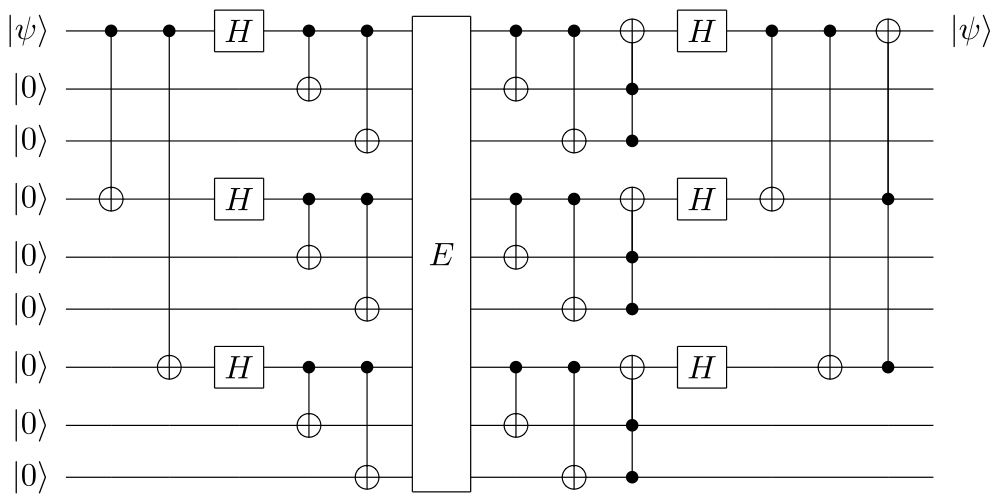

Correcting unitaries is enough to correct for *all* types of errrors (measurement, decoherence, name it!), as whatever happens we remain in the 4-dimensional subspace. We will not delve any deeper on this subject which is too extensive. Shor proposed the first satisfactory error-correcting code, but the qubit-record today is of Laflamme and co-workers, whose proposal can encode 1 logical qubit in only 5 qubits (which turns out to be provably the smallest possible number for qubit encoding, just as 3 is proved to be the smallest number for classical bit encoding). 

What makes the topic of error correction so large is that we still have to consider the requisites for full Quantum Fault-Tolerance. Aharonov & Ben-Or/Zurek et al proved in 1996, fault-tolerance indeed extends to the quantum world and for small enough errors one is possible to solve arbitrary problems in the **BQP** class of complexity. But  tradeoffs now arise, and different encodings and acceptance rates for errors set different thresholds for numbers of qubits necessary for full fault-tolerance!

So keep in mind one final lesson: the number of qubits in a quantum computer is just as important as the reliability of each qubit! And keep an eye in the news for a future breakthrough: the use of a quantum error-correcting code to keep a logical qubit alive for longer than the physical qubits comprising it!!

# References


[W. K. Wootters & W. H. Zurek. A single quantum cannot be cloned. Nature 299 (1982)](https://www.nature.com/articles/299802a0)

[D. Dieks. Communication by EPR devices. Physics Letters A (1982)](https://www.sciencedirect.com/science/article/abs/pii/0375960182900846)

[N. Herbert. FLASH - A Superluminal Communicator Based Upon a New Kind of Quantum Measurement. Foundations of Physics 12 (1982)](https://link.springer.com/article/10.1007/BF00729622)

[Scott Aaronson's notes on quantum error correction](https://www.scottaaronson.com/qclec/27.pdf)

